In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'Goods.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658792 entries, 0 to 1658791
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   time_ref      1658792 non-null  int64  
 1   account       1658792 non-null  object 
 2   code          1658792 non-null  object 
 3   country_code  1657565 non-null  object 
 4   product_type  1658792 non-null  object 
 5   value         1549425 non-null  float64
 6   status        1658792 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 88.6+ MB


In [19]:
df.head()

,time_ref,account,code,country,product_type,value,status
0,202106,Exports,00,United Arab Emirates,Goods,246837046.0,F
1,202106,Exports,00,Afghanistan,Goods,9118.0,F
2,202106,Exports,00,Antigua and Barbuda,Goods,113843.0,F
3,202106,Exports,00,Anguilla,Goods,129290.0,F
4,202106,Exports,00,Albania,Goods,1370.0,F


Read countries code from another CSV

In [5]:
countries = pd.read_csv(r'country_classification.csv')

Drop non countries codes 

In [6]:
df = df[df['country_code'] != 'TOT']
df = df[df['country_code'] != 'TOT (OMT CIF)']
df = df[df['country_code'] != 'TOT (OMT FOB)']
df = df[df['country_code'] != 'TOT (OMT VFD)']
df = df[df['country_code'] != 'TOT (BoP basis)']
df = df[df['country_code'] != 'BoP conceptual adjustment']

Rename country code by its full name


In [7]:
df['country_code'] = df['country_code'].map(countries.set_index('country_code')['country_label'])

In [8]:
df = df.rename(columns={'country_code':'country'})

Drop NaN

In [9]:
df = df.dropna()

In [23]:
def plot_top10(frame,title,xlabel):
  _dict = frame['country'].value_counts().to_dict()
  top10 ={}
  temp = list(_dict.keys())
  for i in range(10):
    top10[temp[i]] = _dict[temp[i]]
  plt.title(title)
  plt.xlabel(xlabel)
  plt.barh(*zip(*top10.items()))

Top 10 importing countries 

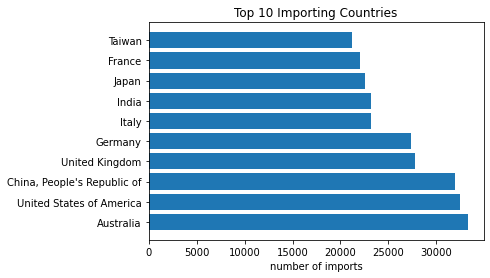

In [21]:
imports = df[df['account'] == 'Imports']
plot_top10(frame =imports,title="Top 10 Importing Countries",xlabel="number of imports")

Top 10 exporting countries

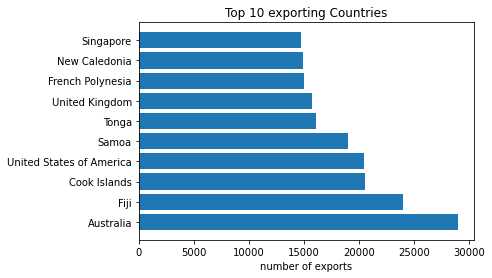

In [22]:
exports = df[df['account'] == 'Exports']
plot_top10(frame =exports,title="Top 10 exporting Countries",xlabel="number of exports")

What are the highest and lowest importing countries ?

In [13]:
def top10_by_value(values,title,xlabel,number_of_iteration):
  top10 = {}
  count = 0
  for key in values.keys():
    if count == number_of_iteration:
      break
    top10[key] = values[key]
    count += 1
  plt.title(title)
  plt.xlabel(xlabel)
  plt.barh(*zip(*top10.items()))
  plt.show()

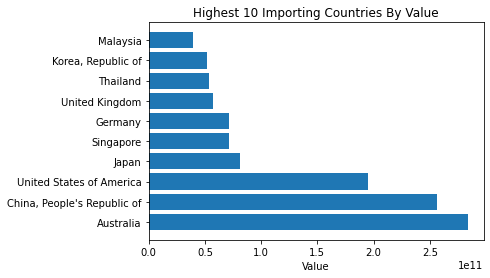

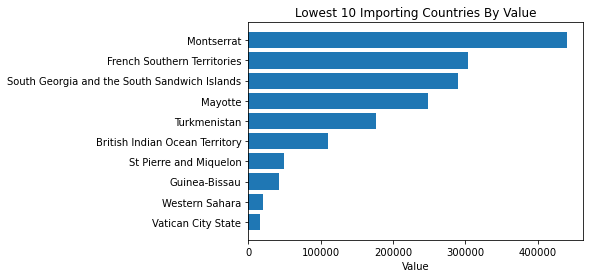

In [14]:
_dict = {}
iter_tuples = list(imports.itertuples())
for name in imports['country'].unique():
  total = 0
  for i in range(len(iter_tuples)):
    if iter_tuples[i][4] == name:
      total += iter_tuples[i][6]
  _dict[name] = total
highest = dict(sorted(_dict.items(), key=lambda item: item[1],reverse = True))
lowest = dict(sorted(_dict.items(), key=lambda item: item[1]))
top10_by_value(highest,"Highest 10 Importing Countries By Value", "Value",10)
top10_by_value(lowest,"Lowest 10 Importing Countries By Value", "Value",10)

What are the highest and lowest exporting countries ?

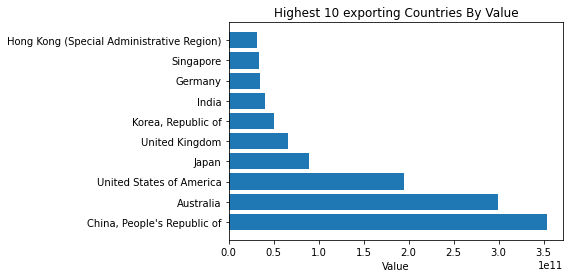

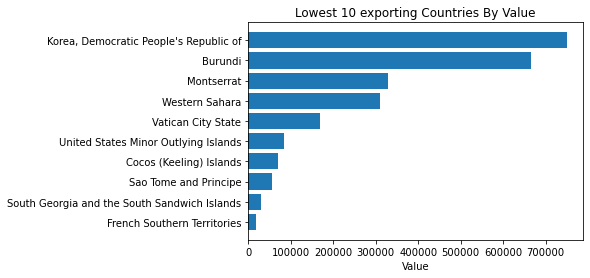

In [15]:
_dict = {}
iter_tuples = list(exports.itertuples())
for name in exports['country'].unique():
  total = 0
  for i in range(len(iter_tuples)):
    if iter_tuples[i][4] == name:
      total += iter_tuples[i][6]
  _dict[name] = total
highest = dict(sorted(_dict.items(), key=lambda item: item[1],reverse = True))
lowest = dict(sorted(_dict.items(), key=lambda item: item[1]))
top10_by_value(highest,"Highest 10 exporting Countries By Value", "Value",10)
top10_by_value(lowest,"Lowest 10 exporting Countries By Value", "Value",10)

In [16]:
def countInYear(frame):
  _dict = {}
  iter_tuples = list(frame.itertuples())
  for year in frame['time_ref'].unique():
    total = 0
    for i in range(len(iter_tuples)):
      if iter_tuples[i][1] == year:
        total += 1 
    _dict[year] = total
  return _dict

Number Of Imports In Years

<ipython-input-17-55cc6838ae73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years['time_ref'] = [str(x)[:-2] for x in years['time_ref']] # remove months


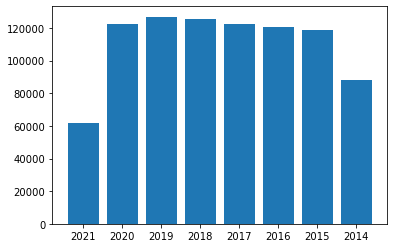

In [17]:
years = df[df['account'] == 'Imports']
years['time_ref'] = [str(x)[:-2] for x in years['time_ref']] # remove months 
plt.bar(*zip(*countInYear(years).items())) # 2021 until June 
plt.show()

Number Of Exports In Years

<ipython-input-18-d711611169c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years['time_ref'] = [str(x)[:-2] for x in years['time_ref']] # remove months


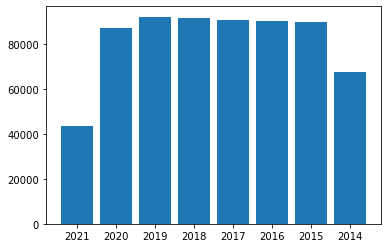

In [18]:
years = df[df['account'] == 'Exports']
years['time_ref'] = [str(x)[:-2] for x in years['time_ref']] # remove months 
plt.bar(*zip(*countInYear(years).items())) # 2021 until June 
plt.show()